In [1140]:
import pandas as pd
import numpy as np
pd.options.display.max_columns=100
import plotly.graph_objects as go
import plotly.express as px
agentsFile = 'AgentsTimeSeries_Results_april12_1435.xlsx'

In [1331]:
incomeDict = {'Low':9000,'Medium':19500,'High':1000000}
Age = {'Under 65':65,
      'Above 65':65}
gridBG = '#f2f2f2'

In [1142]:

res_df = pd.read_excel(agentsFile)

In [1144]:
res_df.head()

,Unnamed: 0,bldCode,doorIndex,bldCodeDoorIndex,ProjNumber,aprtmentSize,yearsInBldg,age,lowDiscount,highDiscount,noDiscount,income,rent,own,agentID,prjectType,tic,status,Floors,MainCost,cityTax,CostForStaying,ratioCostForStaying,reason_leave,mortgage,rentPrice
0,0,210_19,1,210_19_1,20180988,70,32,19,0,1,0,5145.0,0,1,2a6d0426-9b6a-11eb-ab03-acde48001122,0,0,stay,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0
1,1,210_19,2,210_19_2,20180988,70,30,67,0,0,1,13088.0,0,1,2a6d04ee-9b6a-11eb-ab03-acde48001122,0,0,stay,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0
2,2,210_19,3,210_19_3,20180988,70,16,38,0,0,1,15361.0,0,1,2a6d052a-9b6a-11eb-ab03-acde48001122,0,0,stay,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0
3,3,210_19,4,210_19_4,20180988,70,6,16,0,1,0,5428.0,0,1,2a6d0566-9b6a-11eb-ab03-acde48001122,0,0,stay,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0
4,4,210_19,5,210_19_5,20180988,70,17,61,0,0,1,12282.0,1,0,2a6d058e-9b6a-11eb-ab03-acde48001122,0,0,stay,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0


In [1145]:
res_df['stay'] = 0
res_df['stay'] = res_df['status'].apply(lambda x: 1 if x=='stay' else 0)
res_df['leave'] = 0
res_df['leave'] = res_df['status'].apply(lambda x: 1 if x=='leave' else 0)
res_df['New Comers'] = 0
res_df['New Comers'] = res_df['status'].apply(lambda x: 1 if x=='New Comers' else 0)

In [1146]:
res_df.fillna(0,inplace=True)

In [1147]:
res_df['Under 65'] = 0
res_df['Above 65'] = 0
res_df['Low Income'] = 0
res_df['Medium Income'] = 0
res_df['High Income'] = 0

res_df['Under 65'] = res_df['age'].apply(lambda x: 1 if x<65 else 0)
res_df['Above 65'] = res_df['age'].apply(lambda x: 1 if x>=65 else 0)
res_df['Low Income'] = res_df['income'].apply(lambda x: 1 if (x<incomeDict['Low'])   else 0)
res_df['Medium Income'] = res_df['income'].apply(lambda x: 1 if (x>=incomeDict['Low']) & (x<incomeDict['Medium'])  else 0)
res_df['High Income'] =  res_df['income'].apply(lambda x: 1 if (x>=incomeDict['Medium'])  else 0)

<AxesSubplot:>

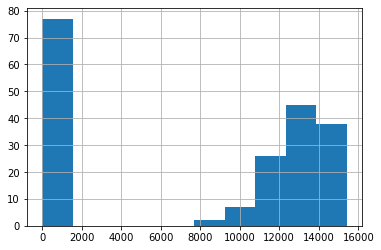

In [1148]:
res_df[(res_df['tic']>0) & (res_df['status']=='stay')]['income'].hist()

In [1149]:
cols_keep=['aprtmentSize','ProjNumber','yearsInBldg','age','rent','own','agentID','prjectType','tic','status','CostForStaying','rentPrice','stay','leave','New Comers','Under 65','Above 65','Low Income','Medium Income','High Income']

In [1150]:
cols_stat=['aprtmentSizeMean','ProjNumber','yearsInBldgMean','aprtmentSizeMeanStay','aprtmentSizeNewComer','AgeMean','AgeMeanNew','AgeMeanStay','AgeMeanLeave','AgeOldStayNew','AgeYoungStayNew','AgeOldStay','AgeYoungStay','AgeOldNew','AgeYoungNew','IncomeMean','IncomeMeanStay','IncomeMeanNew','IncomeMeanLeave','IncomeHighStay','IncomeMedStay','IncomeLowStay','IncomeHighNew','IncomeMedNew','IncomeLowNew','IncomeHighStayNew','IncomeMedStayNew','IncomeLowStayNew','rentCount','ownCount','rentStayCount','rentNewCount','ownStayCount','ownNewCount','TotalAgentsCount','prjectType','tic','stay','new comers','CostForStaying','rentPrice']

In [1151]:
res_df.head(2)

,Unnamed: 0,bldCode,doorIndex,bldCodeDoorIndex,ProjNumber,aprtmentSize,yearsInBldg,age,lowDiscount,highDiscount,noDiscount,income,rent,own,agentID,prjectType,tic,status,Floors,MainCost,cityTax,CostForStaying,ratioCostForStaying,reason_leave,mortgage,rentPrice,stay,leave,New Comers,Under 65,Above 65,Low Income,Medium Income,High Income
0,0,210_19,1,210_19_1,20180988,70,32,19,0,1,0,5145.0,0,1,2a6d0426-9b6a-11eb-ab03-acde48001122,0,0,stay,0.0,0.0,0.0,0.0,0.0,0,0,0.0,1,0,0,1,0,1,0,0
1,1,210_19,2,210_19_2,20180988,70,30,67,0,0,1,13088.0,0,1,2a6d04ee-9b6a-11eb-ab03-acde48001122,0,0,stay,0.0,0.0,0.0,0.0,0.0,0,0,0.0,1,0,0,0,1,0,1,0


<AxesSubplot:>

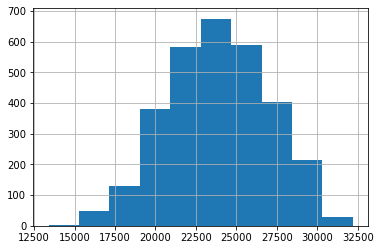

In [1152]:
res_df.query('tic>0 & status=="New Comers"')['income'].hist()
#.groupby(['tic','status']).agg({'Low Income':'sum','Medium Income':'sum','High Income':'sum'})

In [1178]:
simAggStat = pd.DataFrame(columns=cols_stat)
ticList = res_df['tic'].unique()
removeList = []
for tic in ticList:
    print('tic',tic)
    projType = res_df[res_df['tic'] ==tic]['prjectType'].iloc[0]
    if tic==0:
        subset = res_df[res_df['tic'] ==tic][cols_keep].copy()
        subset_notLeave = subset[subset['status'].isin(['stay','New Comers'])].copy()
        subset_leave = subset[subset['status'].isin(['leave'])].copy()
        agg_0 = subset_notLeave.agg({'aprtmentSize':'mean','yearsInBldg':'mean','age':'mean','rent':'sum','own':'sum','agentID':'count','rentPrice':'mean','stay':'sum'})
        agg_0_leave = subset_leave.agg({'leave':'count'})
        simAggStat.loc[tic,['aprtmentSizeMean','yearsInBldgMean','AgeMean','rentCount','ownCount','TotalAgentsCount','rentPrice','stay']]=agg_0.to_frame().transpose().values
        simAggStat.loc[tic,'leave'] = agg_0_leave[0]
    else:

        projNumber = res_df[res_df['tic'] ==tic]['ProjNumber'].iloc[0]
        removeList.append(projNumber)        
        print('projNumber',projNumber)
        subset_step1 = res_df[(res_df['tic']<=tic)].copy() # Grab all the agents from tic and below
        subset_step2 = subset_step1[((subset_step1['tic']==0) & (~subset_step1['ProjNumber'].isin(removeList))) | (subset_step1['tic']>0)] # Remove the project from zero
        #subset = res_df[ (((res_df['tic']<=tic) & (res_df['tic']>0)) |  ((res_df['tic']==0) & (~res_df['ProjNumber'].isin(removeList))))]
        subset_notLeave = subset_step2[subset_step2['status'].isin(['stay','New Comers'])].copy()
        subset_stay = subset_notLeave[subset_notLeave['stay']==1].copy()
        subset_newcomers = subset_notLeave[subset_notLeave['New Comers']==1].copy()
        subset_leave = subset_step2[subset_step2['leave']==1].copy()
        agg_All = subset_notLeave.agg({'aprtmentSize':'mean','yearsInBldg':'mean','age':'mean','rent':'sum','own':'sum','agentID':'count','rentPrice':'mean','stay':'sum','New Comers':'sum','CostForStaying':'mean','Under 65':'sum','Above 65':'sum','Low Income':'sum','Medium Income':'sum','High Income':'sum'})
        agg_Stay      =      subset_stay.agg({'aprtmentSize':'mean','age':'mean','rent':'sum','own':'sum','Under 65':'sum','Above 65':'sum','Low Income':'sum','Medium Income':'sum','High Income':'sum'})
        agg_NewComers = subset_newcomers.agg({'aprtmentSize':'mean','age':'mean','rent':'sum','own':'sum','Under 65':'sum','Above 65':'sum','Low Income':'sum','Medium Income':'sum','High Income':'sum'})
        agg_leave = subset_leave.agg({'leave':'count'})
        simAggStat.loc[tic,['aprtmentSizeMean','yearsInBldgMean','AgeMean','rentCount','ownCount','TotalAgentsCount','rentPrice','stay','new comers','CostForStaying','AgeYoungStayNew','AgeOldStayNew','IncomeLowStayNew','IncomeMedStayNew','IncomeHighStayNew']]=agg_All.to_frame().transpose().values[0]
        simAggStat.loc[tic,'leave'] = agg_leave[0]
        simAggStat.loc[tic,['aprtmentSizeMeanStay','AgeMeanStay','rentStayCount','ownStayCount','AgeYoungStay','AgeOldStay','IncomeLowStay','IncomeMedStay','IncomeHighStay']] = agg_Stay.to_frame().transpose().values[0]
        simAggStat.loc[tic,['aprtmentSizeNewComer','AgeMeanNew','rentNewCount','ownNewCount','AgeYoungNew','AgeOldNew','IncomeLowNew','IncomeMedNew','IncomeHighNew']]  = agg_NewComers.to_frame().transpose().values[0]
        simAggStat.loc[tic,'ProjNumber'] = projNumber
    simAggStat.loc[tic,'tic']=tic
    simAggStat.loc[tic,'prjectType']=projType

    

tic 0
tic 1
projNumber 20180988
tic 2
projNumber 20100133
tic 3
projNumber 20180812
tic 4
projNumber 20181092
tic 5
projNumber 20171974
tic 6
projNumber 20180345
tic 7
projNumber 20140556
tic 8
projNumber 20170076
tic 9
projNumber 502-0196659
tic 10
projNumber 20150857
tic 12
projNumber 20140231
tic 13
projNumber 20150274
tic 14
projNumber 20120894
tic 15
projNumber 20181295
tic 16
projNumber 20140060
tic 17
projNumber 20110270
tic 18
projNumber 20140467
tic 19
projNumber 20160319
tic 20
projNumber 20141182
tic 21
projNumber 502-0654715
tic 22
projNumber 502-0316752
tic 23
projNumber 502-0201483
tic 24
projNumber 502-0583948
tic 25
projNumber 502-0424911
tic 26
projNumber 502-0147678
tic 27
projNumber 502-0178285
tic 28
projNumber 502-0317495
tic 29
projNumber 502-0189720
tic 30
projNumber 502-0316588
tic 31
projNumber 20180845
tic 32
projNumber 502-0368860


## Need to add 
* Age of new comers and staying and leaving
* Income of New comers and staying and leaving
* Age Group of new comers and staying and leaving
* Income Group of new comers and staying

In [1179]:
simAggStat.query('tic>0')

,aprtmentSizeMean,ProjNumber,yearsInBldgMean,aprtmentSizeMeanStay,aprtmentSizeNewComer,AgeMean,AgeMeanNew,AgeMeanStay,AgeMeanLeave,AgeOldStayNew,AgeYoungStayNew,AgeOldStay,AgeYoungStay,AgeOldNew,AgeYoungNew,IncomeMean,IncomeMeanStay,IncomeMeanNew,IncomeMeanLeave,IncomeHighStay,IncomeMedStay,IncomeLowStay,IncomeHighNew,IncomeMedNew,IncomeLowNew,IncomeHighStayNew,IncomeMedStayNew,IncomeLowStayNew,rentCount,ownCount,rentStayCount,rentNewCount,ownStayCount,ownNewCount,TotalAgentsCount,prjectType,tic,stay,new comers,CostForStaying,rentPrice,leave
1,75.337691,20180988,23.67756,75.089266,82.0,47.220044,48.787879,47.161582,NaN,238.0,680.0,230.0,655.0,8.0,25.0,NaN,NaN,NaN,NaN,0.0,377.0,508.0,22.0,11.0,0.0,22.0,388.0,508.0,321.0,597.0,310.0,11.0,575.0,22.0,918.0,1,1,885.0,33.0,248.878715,0.0,12.0
2,75.616379,20100133,23.007543,75.190805,82.0,47.143319,48.844828,47.029885,NaN,237.0,691.0,224.0,646.0,13.0,45.0,NaN,NaN,NaN,NaN,0.0,374.0,496.0,36.0,22.0,0.0,36.0,396.0,496.0,326.0,602.0,304.0,22.0,566.0,36.0,928.0,1,2,870.0,58.0,427.65347,0.0,27.0
3,75.587302,20180812,22.314286,75.660819,74.888889,47.248677,49.1,47.053801,NaN,242.0,703.0,220.0,635.0,22.0,68.0,NaN,NaN,NaN,NaN,0.0,365.0,490.0,36.0,54.0,0.0,36.0,419.0,490.0,327.0,618.0,297.0,30.0,558.0,60.0,945.0,1,3,855.0,90.0,597.379746,0.0,42.0
4,76.027112,20181092,21.590198,75.655991,78.724138,47.117831,48.577586,46.916963,NaN,242.0,717.0,214.0,629.0,28.0,88.0,NaN,NaN,NaN,NaN,0.0,360.0,483.0,60.0,56.0,0.0,60.0,416.0,483.0,331.0,628.0,291.0,40.0,552.0,76.0,959.0,1,4,843.0,116.0,795.139374,0.0,54.0
5,76.627907,20171974,20.691608,75.944844,80.303226,47.193124,49.187097,46.822542,NaN,250.0,739.0,211.0,623.0,39.0,116.0,NaN,NaN,NaN,NaN,0.0,356.0,478.0,91.0,64.0,0.0,91.0,420.0,478.0,344.0,645.0,286.0,58.0,548.0,97.0,989.0,2,5,834.0,155.0,1050.745511,0.0,63.0
6,77.235471,20180345,19.804609,75.927861,82.654639,47.03507,48.268041,46.737562,NaN,247.0,751.0,202.0,602.0,45.0,149.0,NaN,NaN,NaN,NaN,0.0,344.0,460.0,130.0,64.0,0.0,130.0,408.0,460.0,348.0,650.0,274.0,74.0,530.0,120.0,998.0,1,6,804.0,194.0,1341.46011,0.0,93.0
7,77.491107,20140556,19.102767,76.048223,82.566964,47.071146,48.174107,46.757614,NaN,250.0,762.0,199.0,589.0,51.0,173.0,NaN,NaN,NaN,NaN,0.0,342.0,446.0,153.0,71.0,0.0,153.0,413.0,446.0,348.0,664.0,268.0,80.0,520.0,144.0,1012.0,1,7,788.0,224.0,1524.019753,0.0,109.0
8,77.348566,20170076,17.303763,76.179618,80.120846,47.192652,48.23565,46.752866,NaN,274.0,842.0,198.0,587.0,76.0,255.0,NaN,NaN,NaN,NaN,0.0,341.0,444.0,197.0,134.0,0.0,197.0,475.0,444.0,380.0,736.0,266.0,114.0,519.0,217.0,1116.0,2,8,785.0,331.0,1984.386192,0.0,112.0
9,85.773035,502-0196659,10.581301,78.899213,90.963139,46.76355,47.279429,46.080315,NaN,322.0,1154.0,149.0,486.0,173.0,668.0,NaN,NaN,NaN,NaN,0.0,319.0,316.0,707.0,134.0,0.0,707.0,453.0,316.0,457.0,1019.0,176.0,281.0,459.0,560.0,1476.0,3,9,635.0,841.0,4340.11544,0.0,262.0
10,86.497671,20150857,10.146374,78.8016,91.976082,46.689953,47.181093,46.0,NaN,324.0,1179.0,146.0,479.0,178.0,700.0,NaN,NaN,NaN,NaN,0.0,314.0,311.0,744.0,134.0,0.0,744.0,448.0,311.0,467.0,1036.0,172.0,295.0,453.0,583.0,1503.0,2,10,625.0,878.0,4492.211537,0.0,272.0


In [1180]:
firstGraph = simAggStat[['tic','prjectType','stay','new comers','TotalAgentsCount']]

In [1181]:
firstGraph.columns = ['tic','Project Type','Staying','New Comers','Total Citizens']

In [1182]:
firstGraph = firstGraph.fillna(0)

In [1183]:
firstGraph.head()

,tic,Project Type,Staying,New Comers,Total Citizens
0,0,0,897.0,0.0,897.0
1,1,1,885.0,33.0,918.0
2,2,1,870.0,58.0,928.0
3,3,1,855.0,90.0,945.0
4,4,1,843.0,116.0,959.0


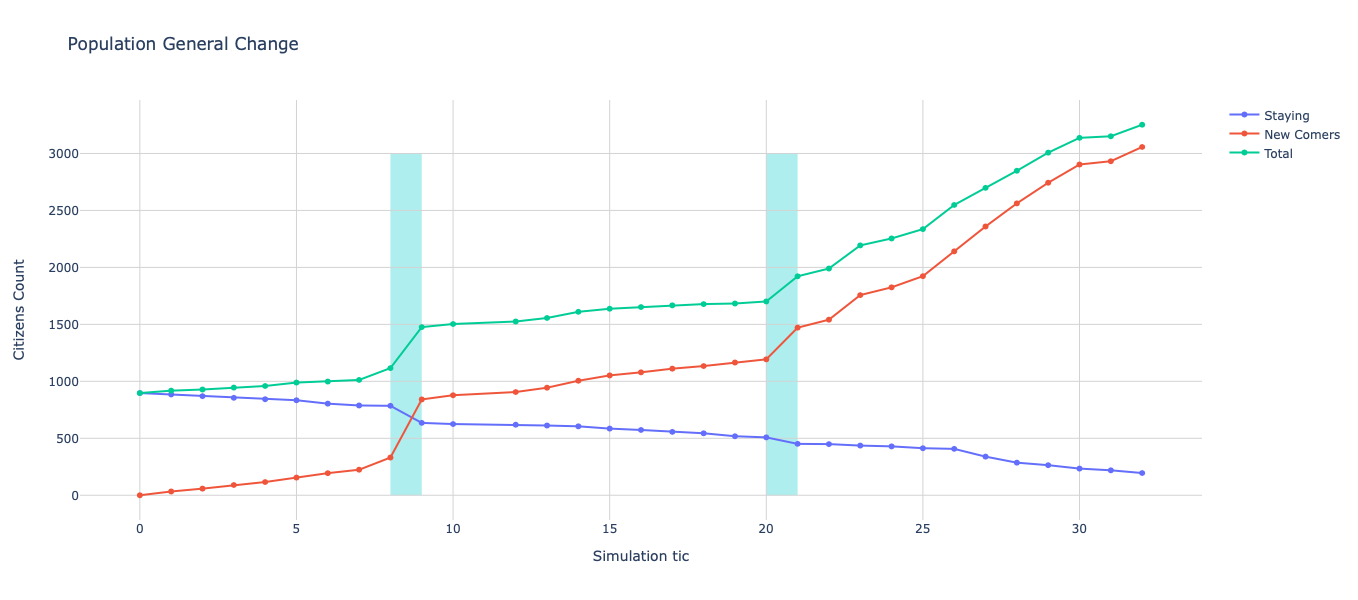

In [1184]:
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=firstGraph['tic'],
    y=firstGraph['Staying'],
    mode="lines+markers",
    name="Staying"
))
fig.add_trace(go.Scatter(
    x=firstGraph['tic'],
    y=firstGraph['New Comers'],
    mode="lines+markers",
    name="New Comers"
))

fig.add_trace(go.Scatter(
    x=firstGraph['tic'],
    y=firstGraph['Total Citizens'],
    mode="lines+markers",
    name="Total"
))



fig.add_shape(type="rect",
    x0=8, y0=0,
    x1=9, y1=3000,
    line=dict(
        color="LightSeaGreen",
        width=0,
    ),layer='below',
    fillcolor="PaleTurquoise",
)

fig.add_shape(type="rect",
    x0=20, y0=0,
    x1=21, y1=3000,
    line=dict(
        color="LightSeaGreen",
        width=0,
    ),layer='below',
    fillcolor="PaleTurquoise",visible=True
)
fig.update_layout(width=800,height=600, title='Population General Change')
fig.update_yaxes(title='Citizens Count',gridwidth=1, gridcolor=gridBG,zerolinewidth=1,zerolinecolor='lightgrey')
fig.update_xaxes(title='Simulation tic',gridwidth=1, gridcolor=gridBG,zerolinewidth=1,zerolinecolor='lightgrey')
fig.update_layout(showlegend=True,plot_bgcolor='rgba(0,0,0,0)')
fig.show()

In [1185]:
res2 = simAggStat.loc[1:].copy()

In [1186]:
res2 = res2[res2.columns[res2.notnull().loc[1].values]].copy()

## Apartment Size

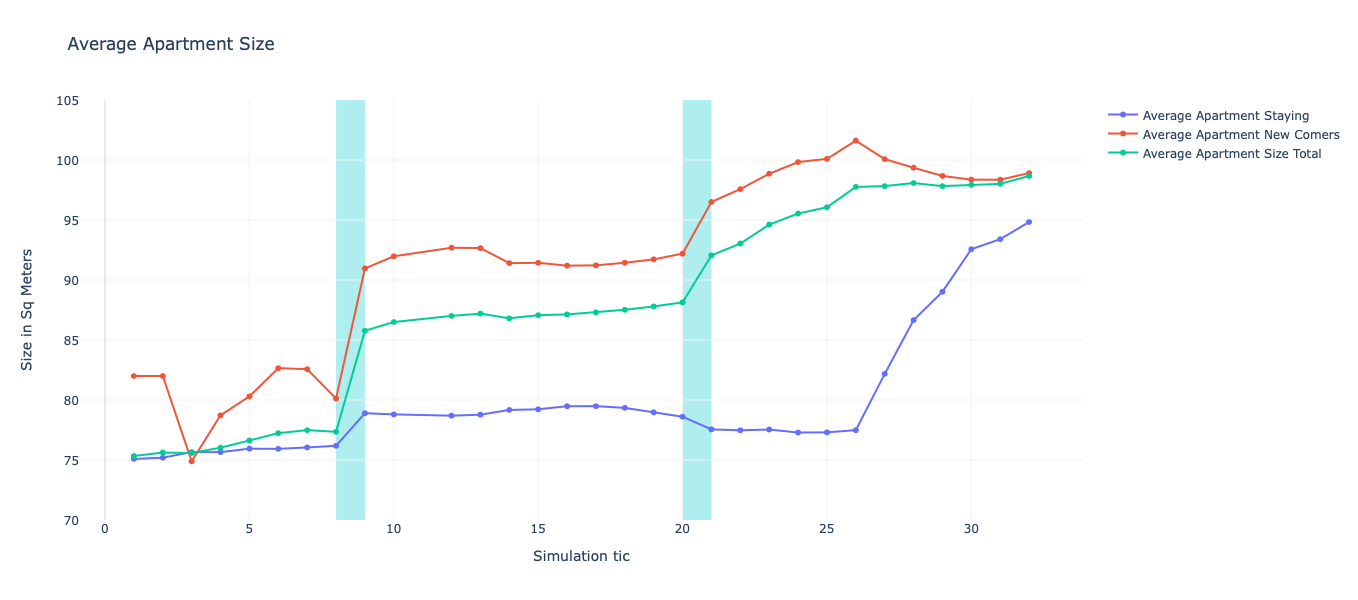

In [1332]:
graph10 = res2.copy()
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=graph10['tic'],
    y=graph10['aprtmentSizeMeanStay'],
    mode="lines+markers",
    name="Average Apartment Staying"
))
fig.add_trace(go.Scatter(
    x=graph10['tic'],
    y=graph10['aprtmentSizeNewComer'],
    mode="lines+markers",
    name="Average Apartment New Comers"
))

fig.add_trace(go.Scatter(
    x=graph10['tic'],
    y=graph10['aprtmentSizeMean'],
    mode="lines+markers",
    name="Average Apartment Size Total"
))



fig.add_shape(type="rect",
    x0=8, y0=70,
    x1=9, y1=105,
    line=dict(
        color="LightSeaGreen",
        width=0,
    ),layer='below',
    fillcolor="PaleTurquoise",
)

fig.add_shape(type="rect",
    x0=20, y0=70,
    x1=21, y1=105,
    line=dict(
        color="LightSeaGreen",
        width=0,
    ),layer='below',
    fillcolor="PaleTurquoise",visible=True
)
fig.update_layout(width=800,height=600, title='Average Apartment Size')
fig.update_yaxes(title='Size in Sq Meters',gridwidth=1, gridcolor=gridBG,zerolinewidth=1,zerolinecolor='lightgrey')
fig.update_xaxes(title='Simulation tic',gridwidth=1, gridcolor=gridBG,zerolinewidth=1,zerolinecolor='lightgrey')
fig.update_layout(showlegend=True,plot_bgcolor='rgba(0,0,0,0)')
fig.show()

# Age Change Move In and Move Out

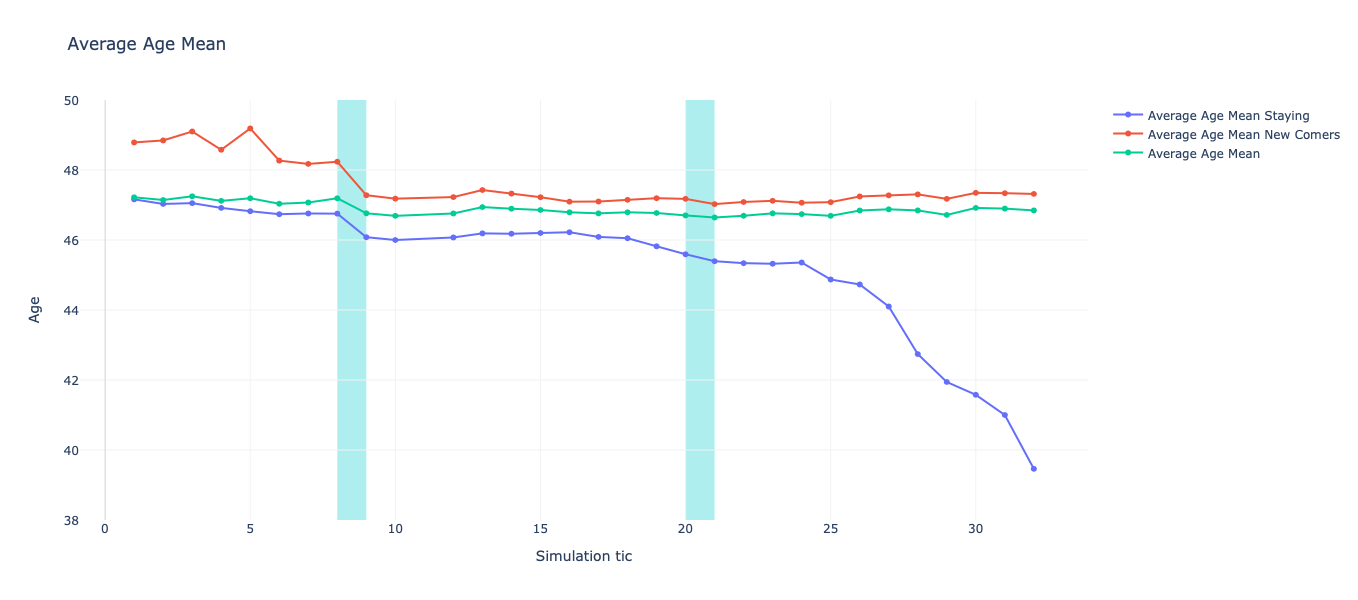

In [1333]:
graph11 = res2.copy()
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=graph11['tic'],
    y=graph11['AgeMeanStay'],
    mode="lines+markers",
    name="Average Age Mean Staying"
))
fig.add_trace(go.Scatter(
    x=graph11['tic'],
    y=graph11['AgeMeanNew'],
    mode="lines+markers",
    name="Average Age Mean New Comers"
))

fig.add_trace(go.Scatter(
    x=graph11['tic'],
    y=graph11['AgeMean'],
    mode="lines+markers",
    name="Average Age Mean"
))



fig.add_shape(type="rect",
    x0=8, y0=38,
    x1=9, y1=50,
    line=dict(
        color="LightSeaGreen",
        width=0,
    ),layer='below',
    fillcolor="PaleTurquoise",
)

fig.add_shape(type="rect",
    x0=20, y0=38,
    x1=21, y1=50,
    line=dict(
        color="LightSeaGreen",
        width=0,
    ),layer='below',
    fillcolor="PaleTurquoise",visible=True
)
fig.update_layout(width=800,height=600, title='Average Age Mean')
fig.update_yaxes(title='Age',gridwidth=1, gridcolor=gridBG,zerolinewidth=1,zerolinecolor='lightgrey')
fig.update_xaxes(title='Simulation tic',gridwidth=1, gridcolor=gridBG,zerolinewidth=1,zerolinecolor='lightgrey')
fig.update_layout(showlegend=True,plot_bgcolor='rgba(0,0,0,0)')
fig.show()

## Rent And Go

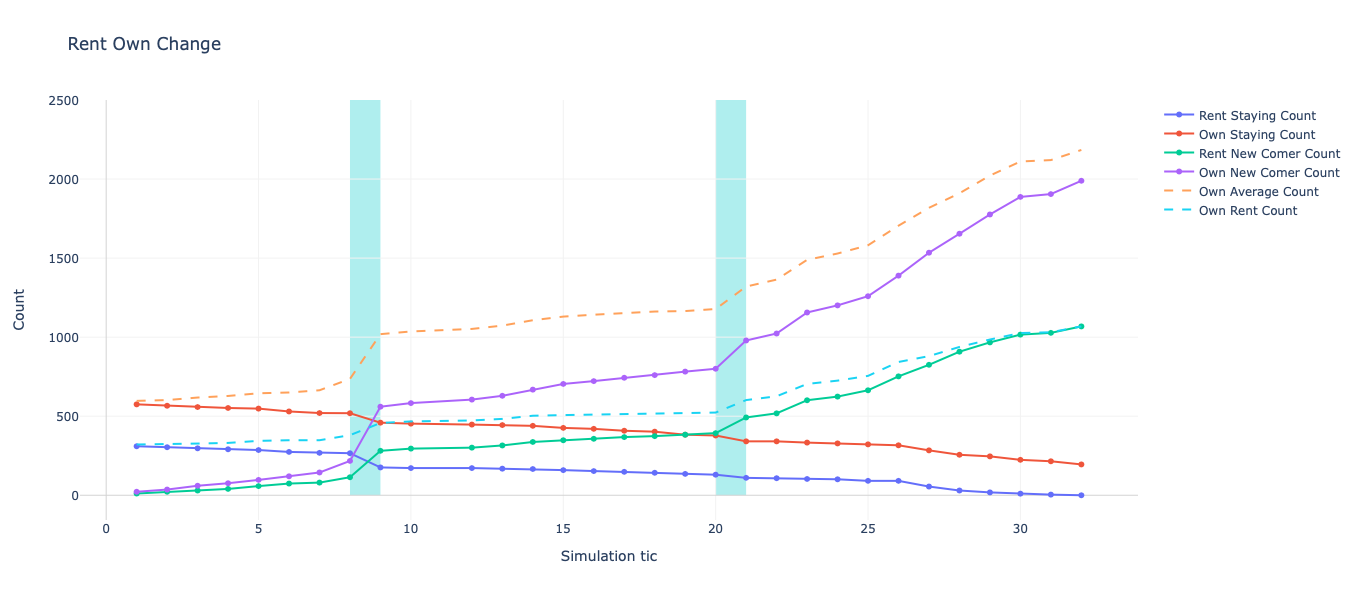

In [1334]:
graph12 = res2.copy()
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=graph12['tic'],
    y=graph12['rentStayCount'],
    mode="lines+markers",
    name="Rent Staying Count"
))
fig.add_trace(go.Scatter(
    x=graph12['tic'],
    y=graph12['ownStayCount'],
    mode="lines+markers",
    name="Own Staying Count"
))
fig.add_trace(go.Scatter(
    x=graph12['tic'],
    y=graph12['rentNewCount'],
    mode="lines+markers",
    name="Rent New Comer Count"
))
fig.add_trace(go.Scatter(
    x=graph12['tic'],
    y=graph12['ownNewCount'],
    mode="lines+markers",
    name="Own New Comer Count"
))


fig.add_trace(go.Scatter(
    x=graph12['tic'],
    y=graph12['ownCount'],
    line=dict(dash='dash'),
    name="Own Average Count"
))




fig.add_trace(go.Scatter(
    x=graph12['tic'],
    y=graph12['rentCount'],
    line=dict(dash='dash'),
    name="Own Rent Count"
))





fig.add_shape(type="rect",
    x0=8, y0=0,
    x1=9, y1=2500,
    line=dict(
        color="LightSeaGreen",
        width=0,
    ),layer='below',
    fillcolor="PaleTurquoise",
)

fig.add_shape(type="rect",
    x0=20, y0=0,
    x1=21, y1=2500,
    line=dict(
        color="LightSeaGreen",
        width=0,
    ),layer='below',
    fillcolor="PaleTurquoise",visible=True
)
fig.update_layout(width=800,height=600, title='Rent Own Change')
fig.update_yaxes(title='Count',gridwidth=1, gridcolor=gridBG,zerolinewidth=1,zerolinecolor='lightgrey')
fig.update_xaxes(title='Simulation tic',gridwidth=1, gridcolor=gridBG,zerolinewidth=1,zerolinecolor='lightgrey')
fig.update_layout(showlegend=True,plot_bgcolor='rgba(0,0,0,0)')
fig.show()

In [1190]:
graph12.head()

,aprtmentSizeMean,ProjNumber,yearsInBldgMean,aprtmentSizeMeanStay,aprtmentSizeNewComer,AgeMean,AgeMeanNew,AgeMeanStay,AgeOldStayNew,AgeYoungStayNew,AgeOldStay,AgeYoungStay,AgeOldNew,AgeYoungNew,IncomeHighStay,IncomeMedStay,IncomeLowStay,IncomeHighNew,IncomeMedNew,IncomeLowNew,IncomeHighStayNew,IncomeMedStayNew,IncomeLowStayNew,rentCount,ownCount,rentStayCount,rentNewCount,ownStayCount,ownNewCount,TotalAgentsCount,prjectType,tic,stay,new comers,CostForStaying,rentPrice,leave
1,75.337691,20180988,23.67756,75.089266,82.0,47.220044,48.787879,47.161582,238.0,680.0,230.0,655.0,8.0,25.0,0.0,377.0,508.0,22.0,11.0,0.0,22.0,388.0,508.0,321.0,597.0,310.0,11.0,575.0,22.0,918.0,1,1,885.0,33.0,248.878715,0.0,12.0
2,75.616379,20100133,23.007543,75.190805,82.0,47.143319,48.844828,47.029885,237.0,691.0,224.0,646.0,13.0,45.0,0.0,374.0,496.0,36.0,22.0,0.0,36.0,396.0,496.0,326.0,602.0,304.0,22.0,566.0,36.0,928.0,1,2,870.0,58.0,427.65347,0.0,27.0
3,75.587302,20180812,22.314286,75.660819,74.888889,47.248677,49.1,47.053801,242.0,703.0,220.0,635.0,22.0,68.0,0.0,365.0,490.0,36.0,54.0,0.0,36.0,419.0,490.0,327.0,618.0,297.0,30.0,558.0,60.0,945.0,1,3,855.0,90.0,597.379746,0.0,42.0
4,76.027112,20181092,21.590198,75.655991,78.724138,47.117831,48.577586,46.916963,242.0,717.0,214.0,629.0,28.0,88.0,0.0,360.0,483.0,60.0,56.0,0.0,60.0,416.0,483.0,331.0,628.0,291.0,40.0,552.0,76.0,959.0,1,4,843.0,116.0,795.139374,0.0,54.0
5,76.627907,20171974,20.691608,75.944844,80.303226,47.193124,49.187097,46.822542,250.0,739.0,211.0,623.0,39.0,116.0,0.0,356.0,478.0,91.0,64.0,0.0,91.0,420.0,478.0,344.0,645.0,286.0,58.0,548.0,97.0,989.0,2,5,834.0,155.0,1050.745511,0.0,63.0


In [1191]:
graph12 = graph12[['tic','rentStayCount','ownStayCount','rentNewCount','ownNewCount','ownCount','rentCount','TotalAgentsCount']].copy()

In [1192]:
graph12.head()

,tic,rentStayCount,ownStayCount,rentNewCount,ownNewCount,ownCount,rentCount,TotalAgentsCount
1,1,310.0,575.0,11.0,22.0,597.0,321.0,918.0
2,2,304.0,566.0,22.0,36.0,602.0,326.0,928.0
3,3,297.0,558.0,30.0,60.0,618.0,327.0,945.0
4,4,291.0,552.0,40.0,76.0,628.0,331.0,959.0
5,5,286.0,548.0,58.0,97.0,645.0,344.0,989.0


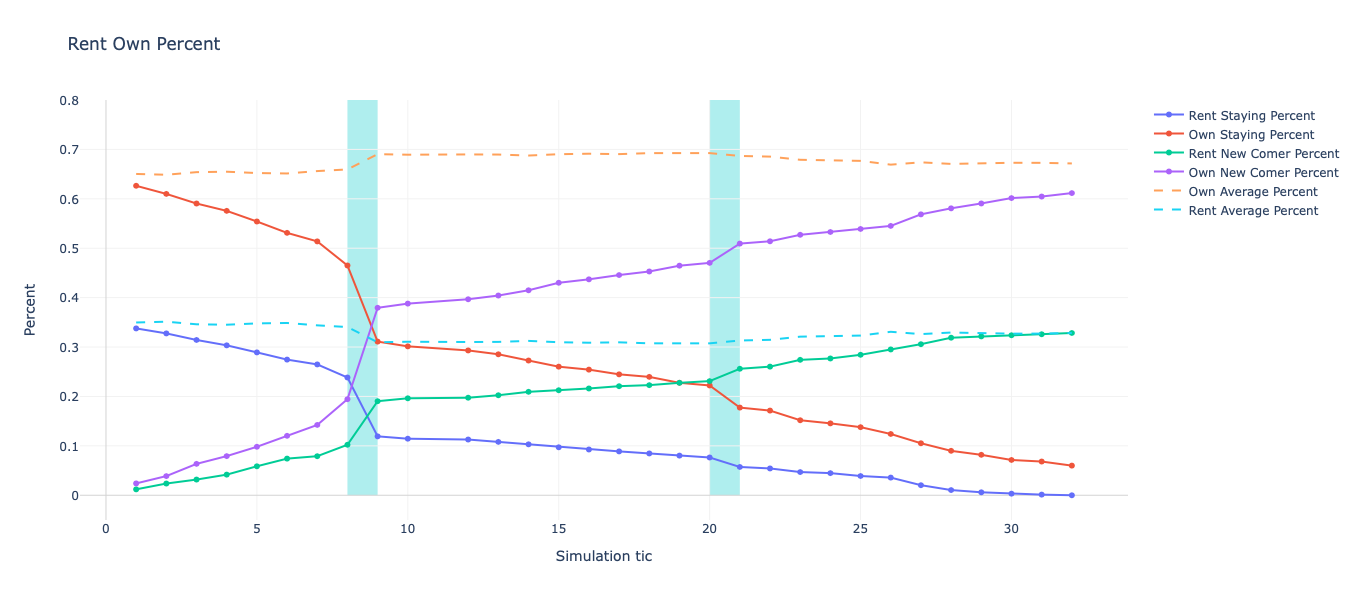

In [1335]:
graph12['rentStayPercent'] = graph12['rentStayCount']/graph12['TotalAgentsCount']
graph12['ownStayPercent'] = graph12['ownStayCount']/graph12['TotalAgentsCount']
graph12['rentNewPercent'] = graph12['rentNewCount']/graph12['TotalAgentsCount']
graph12['ownNewPercent'] = graph12['ownNewCount']/graph12['TotalAgentsCount']
graph12['ownPercent'] = graph12['ownCount']/graph12['TotalAgentsCount']
graph12['rentPercent'] = graph12['rentCount']/graph12['TotalAgentsCount']
#graph12[''rentStayCount','ownStayCount','rentNewCount','ownNewCount','ownCount','rentCount','TotalAgentsCount'']
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=graph12['tic'],
    y=graph12['rentStayPercent'],
    mode="lines+markers",
    name="Rent Staying Percent"
))
fig.add_trace(go.Scatter(
    x=graph12['tic'],
    y=graph12['ownStayPercent'],
    mode="lines+markers",
    name="Own Staying Percent"
))
fig.add_trace(go.Scatter(
    x=graph12['tic'],
    y=graph12['rentNewPercent'],
    mode="lines+markers",
    name="Rent New Comer Percent"
))
fig.add_trace(go.Scatter(
    x=graph12['tic'],
    y=graph12['ownNewPercent'],
    mode="lines+markers",
    name="Own New Comer Percent"
))


fig.add_trace(go.Scatter(
    x=graph12['tic'],
    y=graph12['ownPercent'],
    line=dict(dash='dash'),
    name="Own Average Percent"
))




fig.add_trace(go.Scatter(
    x=graph12['tic'],
    y=graph12['rentPercent'],
    line=dict(dash='dash'),
    name="Rent Average Percent"
))



fig.add_shape(type="rect",
    x0=8, y0=0,
    x1=9, y1=0.8,
    line=dict(
        color="LightSeaGreen",
        width=0,
    ),layer='below',
    fillcolor="PaleTurquoise",
)

fig.add_shape(type="rect",
    x0=20, y0=0,
    x1=21, y1=0.8,
    line=dict(
        color="LightSeaGreen",
        width=0,
    ),layer='below',
    fillcolor="PaleTurquoise",visible=True
)
fig.update_layout(width=1000,height=600, title='Rent Own Percent')
fig.update_yaxes(title='Percent',gridwidth=1, gridcolor=gridBG,zerolinewidth=1,zerolinecolor='lightgrey')
fig.update_xaxes(title='Simulation tic',gridwidth=1, gridcolor=gridBG,zerolinewidth=1,zerolinecolor='lightgrey')
fig.update_layout(showlegend=True,plot_bgcolor='rgba(0,0,0,0)')
fig.show()

# Age Move in move out with Class

In [1337]:
graph13 = res2.copy()
columnsList = ['AgeOldStay','AgeYoungStay','AgeOldNew','AgeYoungNew','AgeOldStayNew','AgeYoungStayNew']
titlesList = ['Above 65 Stay','Below 65 Stay','Above 65 New Comers',' Below 65 New Comers','Above 65 (total)','Below 65 (total)']
percentList =[f'{columnsList[0]}Percent',f'{columnsList[1]}Percent',f'{columnsList[2]}Percent',f'{columnsList[3]}Percent',f'{columnsList[4]}Percent',f'{columnsList[5]}Percent']
styleList = [dict(color='hsv(0,50%,100%)', width=4),dict(color='hsv(0,100%,50%)', width=4),dict(color='hsv(0,50%,100%)', width=2),dict(color='hsv(0,100%,50%)', width=2),dict(color='hsv(30,50%,100%)',dash='dash'),dict(color='hsv(30,25%,100%)', dash='dash')]
for i in range(6):
    graph13[percentList[i]] = graph13[columnsList[i]]/graph13['TotalAgentsCount']

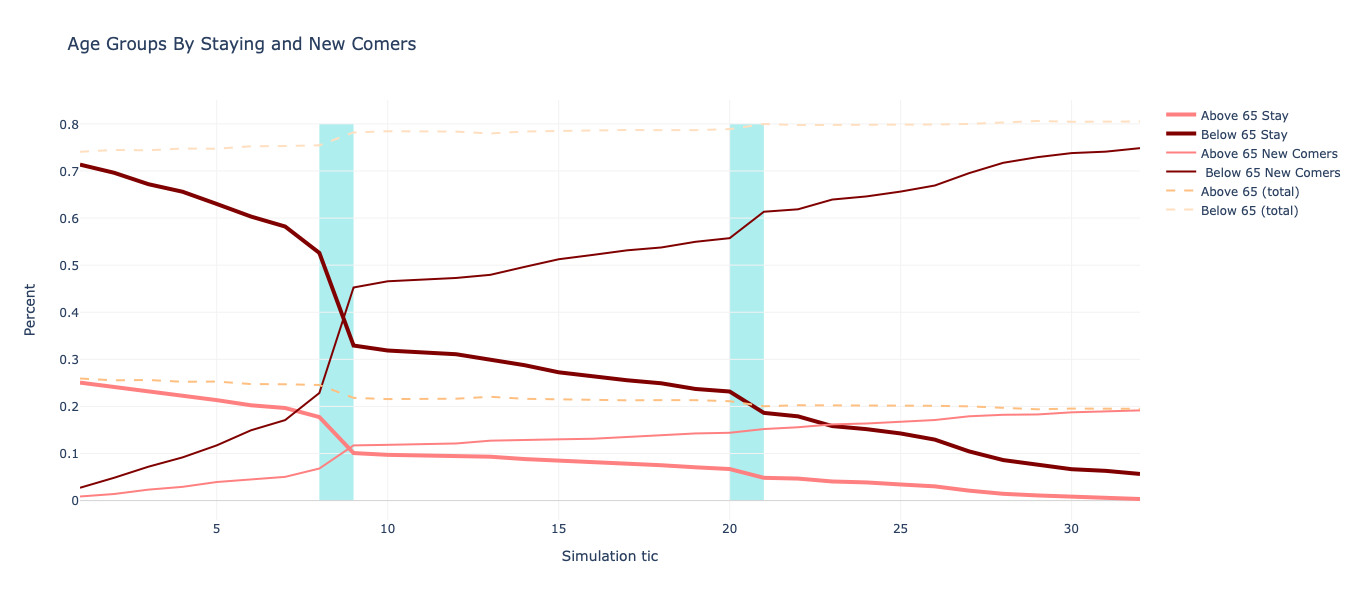

In [1338]:

#graph12[''rentStayCount','ownStayCount','rentNewCount','ownNewCount','ownCount','rentCount','TotalAgentsCount'']
fig = go.Figure()
for i in range(6):
    fig.add_trace(go.Scatter(
        x=graph13['tic'],
        y=graph13[percentList[i]],
        line=styleList[i],
        name=titlesList[i]
    ))



# fig.add_trace(go.Scatter(
#     x=graph12['tic'],
#     y=graph12['rentPercent'],
#     line=dict(dash='dash'),
#     name="Rent Average Percent"
# ))



fig.add_shape(type="rect",
    x0=8, y0=0,
    x1=9, y1=0.8,
    line=dict(
        color="LightSeaGreen",
        width=0,
    ),layer='below',
    fillcolor="PaleTurquoise",
)

fig.add_shape(type="rect",
    x0=20, y0=0,
    x1=21, y1=0.8,
    line=dict(
        color="LightSeaGreen",
        width=0,
    ),layer='below',
    fillcolor="PaleTurquoise",visible=True
)
fig.update_layout(width=1000,height=600, title='Age Groups By Staying and New Comers')
fig.update_yaxes(title='Percent',gridwidth=1, gridcolor=gridBG,zerolinewidth=1,zerolinecolor='lightgrey')
fig.update_xaxes(title='Simulation tic',gridwidth=1, gridcolor=gridBG,zerolinewidth=1,zerolinecolor='lightgrey')
fig.update_layout(showlegend=True,plot_bgcolor='rgba(0,0,0,0)')
fig.show()

In [1339]:
graph14 = res2.copy()
columnsList = ['AgeOldStay','AgeYoungStay','AgeOldNew','AgeYoungNew','AgeOldStayNew','AgeYoungStayNew']
titlesList = ['Above 65 Stay','Below 65 Stay','Above 65 New Comers',' Below 65 New Comers','Above 65 (total)','Below 65 (total)']
styleList = [dict(color='hsv(0,50%,100%)', width=4),dict(color='hsv(0,100%,50%)', width=4),dict(color='hsv(0,50%,100%)', width=2),dict(color='hsv(0,100%,50%)', width=2),dict(color='hsv(30,50%,100%)',dash='dash'),dict(color='hsv(30,25%,100%)', dash='dash')]


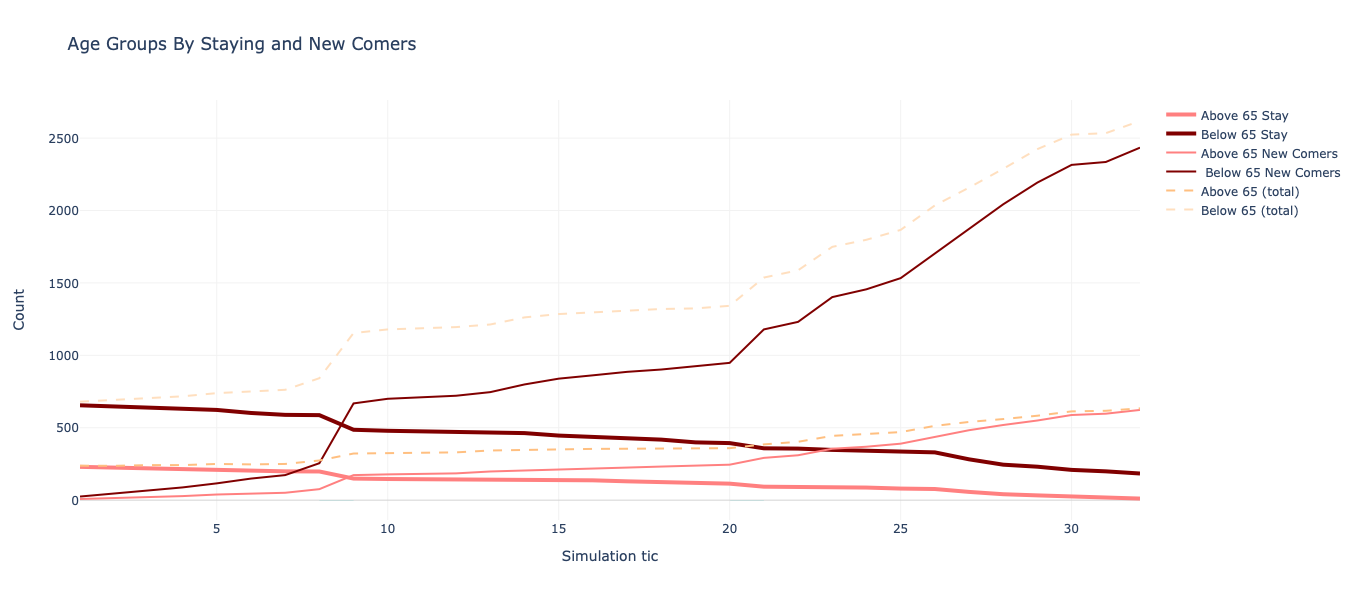

In [1340]:

#graph12[''rentStayCount','ownStayCount','rentNewCount','ownNewCount','ownCount','rentCount','TotalAgentsCount'']
fig = go.Figure()
for i in range(6):
    fig.add_trace(go.Scatter(
        x=graph14['tic'],
        y=graph14[columnsList[i]],
        line=styleList[i],
        name=titlesList[i]
    ))


fig.add_shape(type="rect",
    x0=8, y0=0,
    x1=9, y1=0.8,
    line=dict(
        color="LightSeaGreen",
        width=0,
    ),layer='below',
    fillcolor="PaleTurquoise",
)

fig.add_shape(type="rect",
    x0=20, y0=0,
    x1=21, y1=0.8,
    line=dict(
        color="LightSeaGreen",
        width=0,
    ),layer='below',
    fillcolor="PaleTurquoise",visible=True
)
fig.update_layout(width=1000,height=600, title='Age Groups By Staying and New Comers')
fig.update_yaxes(title='Count',gridwidth=1, gridcolor=gridBG,zerolinewidth=1,zerolinecolor='lightgrey')
fig.update_xaxes(title='Simulation tic',gridwidth=1, gridcolor=gridBG,zerolinewidth=1,zerolinecolor='lightgrey')
fig.update_layout(showlegend=True,plot_bgcolor='rgba(0,0,0,0)')
fig.show()

In [1341]:
graph15 = res2.copy()
columnsList = ['IncomeHighStay','IncomeMedStay','IncomeLowStay','IncomeHighNew','IncomeMedNew','IncomeLowNew','IncomeHighStayNew','IncomeMedStayNew','IncomeLowStayNew']
titlesList = ['Income High Stay','Income Med Stay','Income Low Stay','Income High New Comer','Income Med New Comer','Income Low New Comer',' Income High (total)','Income Med (total)','Income Low (total)']
styleList = [dict(color='hsv(0,100%,50%)',width=4),
             dict(color='hsv(0,100%,100%)',width=4),
             dict(color='hsv(0,50%,100%)',width=4),
             dict(color='hsv(0,100%,50%)', width=2),
             dict(color='hsv(0,100%,100%)', width=2),
             dict(color='hsv(0,50%,100%)', width=2),
             dict(color='hsv(30,50%,100%)',dash='dash'),
             dict(color='hsv(30,75%,100%)', dash='dash'),
             dict(color='hsv(30,100%,50%)', dash='dash')]
percentList=[]
for i in range(9):
    percentList.append(f'{columnsList[i]}Percent')
    graph15[percentList[i]] = graph15[columnsList[i]]/graph15['TotalAgentsCount']



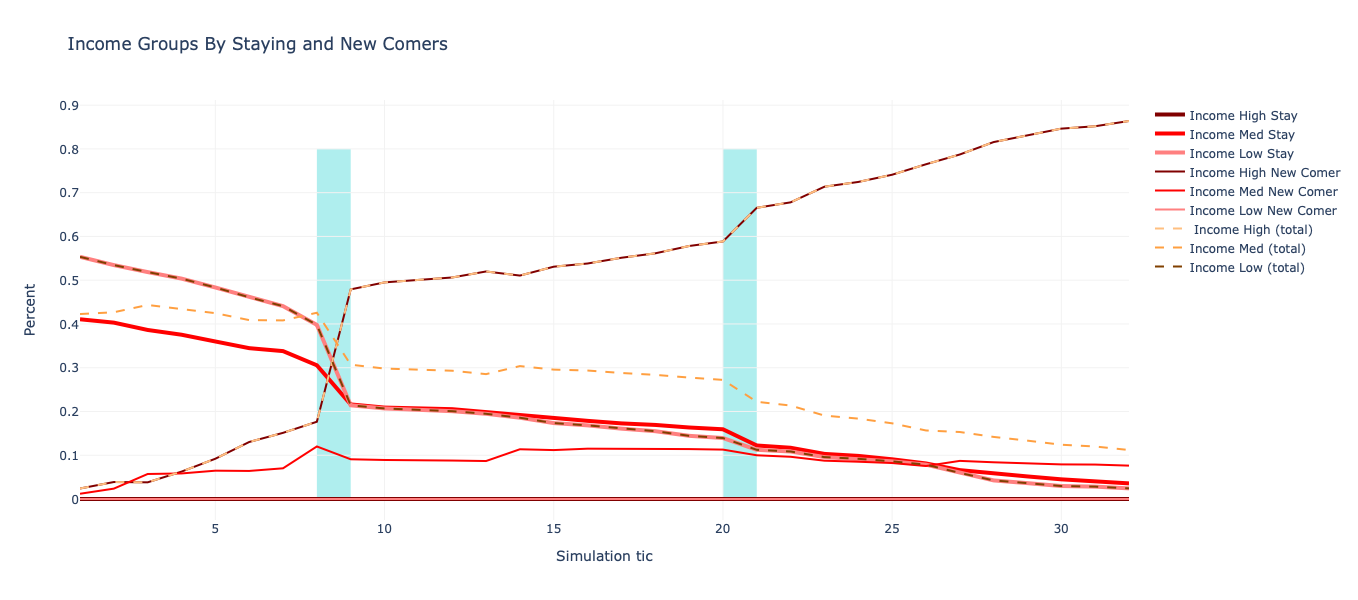

In [1342]:

fig = go.Figure()
for i in range(9):
    fig.add_trace(go.Scatter(
        x=graph15['tic'],
        y=graph15[percentList[i]],
        line=styleList[i],
        name=titlesList[i]
    ))

fig.add_shape(type="rect",
    x0=8, y0=0,
    x1=9, y1=0.8,
    line=dict(
        color="LightSeaGreen",
        width=0,
    ),layer='below',
    fillcolor="PaleTurquoise",
)

fig.add_shape(type="rect",
    x0=20, y0=0,
    x1=21, y1=0.8,
    line=dict(
        color="LightSeaGreen",
        width=0,
    ),layer='below',
    fillcolor="PaleTurquoise",visible=True
)
fig.update_layout(width=1000,height=600, title='Income Groups By Staying and New Comers')
fig.update_yaxes(title='Percent',gridwidth=1, gridcolor=gridBG,zerolinewidth=1,zerolinecolor='lightgrey')
fig.update_xaxes(title='Simulation tic',gridwidth=1, gridcolor=gridBG,zerolinewidth=1,zerolinecolor='lightgrey')
fig.update_layout(showlegend=True,plot_bgcolor='rgba(0,0,0,0)')
fig.show()

In [1202]:
subset_before_after = res_df.copy()
subset_before_after = subset_before_after[subset_before_after['status']!='leave']

In [1203]:
subset_before_after['simulationState'] =subset_before_after['tic'].apply(lambda x: 'Before Renewal' if x==0 else 'After Renewal')

In [1204]:
subset_before_after['simulationState'].value_counts()

After Renewal     3252
Before Renewal     897
Name: simulationState, dtype: int64

In [1205]:
sub_1_32 = subset_before_after[['simulationState','income','age','agentID']].copy()

In [1206]:
sub_1_32['ageGroup'] = sub_1_32['age'].apply(lambda x: 'Under 65' if x<65 else 'Above 65')
sub_1_32['incomeGroup'] = sub_1_32['income'].apply(lambda x: 'High Income' if x>=19500  
                                                   else  ('Medium Income' if ((x>=9000)&(x<19500)) else 'Low Income'))

In [1207]:
sub_1_32['incomeGroup'].value_counts()

High Income      2809
Medium Income     748
Low Income        592
Name: incomeGroup, dtype: int64

In [1208]:
sub_1_32 = sub_1_32[['simulationState','ageGroup','incomeGroup','agentID']].copy()

In [1209]:
ageIncome1_32 = sub_1_32.groupby(['simulationState','ageGroup','incomeGroup']).agg({'agentID':'count'}).reset_index()

In [1210]:
ageIncome1_32

,simulationState,ageGroup,incomeGroup,agentID
0,After Renewal,Above 65,High Income,566
1,After Renewal,Above 65,Low Income,5
2,After Renewal,Above 65,Medium Income,63
3,After Renewal,Under 65,High Income,2243
4,After Renewal,Under 65,Low Income,74
5,After Renewal,Under 65,Medium Income,301
6,Before Renewal,Above 65,Low Income,126
7,Before Renewal,Above 65,Medium Income,106
8,Before Renewal,Under 65,Low Income,387
9,Before Renewal,Under 65,Medium Income,278


In [1211]:
ageIncome1_32.rename(columns={'ageGroup':'Age Group','incomeGroup':'Income Group','agentID':'Count'},inplace=True)

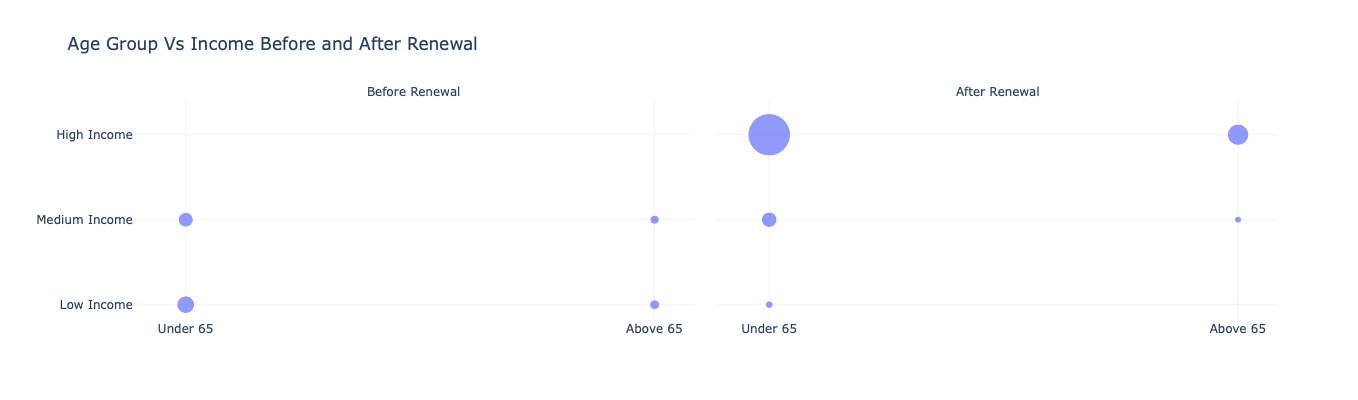

In [1376]:
import plotly.express as px
title_ = 'Age Group Vs Income Before and After Renewal'

fig = px.scatter(ageIncome1_32, x="Age Group", y="Income Group",
            size="Count",facet_col='simulationState', title=title_,size_max=30,
            category_orders={"Age Group": ["Under 65","Above 65"],
                            "Income Group": ['High Income', 'Medium Income', 'Low Income'],
                            "simulationState":['Before Renewal','After Renewal']},width=600,height=400)
fig.update_yaxes(gridwidth=1, gridcolor=gridBG,zerolinewidth=1,zerolinecolor='lightgrey',title='')
fig.update_xaxes(gridwidth=1, gridcolor=gridBG,zerolinewidth=1,zerolinecolor='lightgrey',title='')
fig.update_layout(plot_bgcolor='rgba(0,0,0,0)')
fig.layout['annotations'][0]['text'] = 'Before Renewal'
fig.layout['annotations'][1]['text'] = 'After Renewal'
fig.update_traces(showlegend=False)

In [1215]:
res2.head()

,aprtmentSizeMean,ProjNumber,yearsInBldgMean,aprtmentSizeMeanStay,aprtmentSizeNewComer,AgeMean,AgeMeanNew,AgeMeanStay,AgeOldStayNew,AgeYoungStayNew,AgeOldStay,AgeYoungStay,AgeOldNew,AgeYoungNew,IncomeHighStay,IncomeMedStay,IncomeLowStay,IncomeHighNew,IncomeMedNew,IncomeLowNew,IncomeHighStayNew,IncomeMedStayNew,IncomeLowStayNew,rentCount,ownCount,rentStayCount,rentNewCount,ownStayCount,ownNewCount,TotalAgentsCount,prjectType,tic,stay,new comers,CostForStaying,rentPrice,leave
1,75.337691,20180988,23.67756,75.089266,82.0,47.220044,48.787879,47.161582,238.0,680.0,230.0,655.0,8.0,25.0,0.0,377.0,508.0,22.0,11.0,0.0,22.0,388.0,508.0,321.0,597.0,310.0,11.0,575.0,22.0,918.0,1,1,885.0,33.0,248.878715,0.0,12.0
2,75.616379,20100133,23.007543,75.190805,82.0,47.143319,48.844828,47.029885,237.0,691.0,224.0,646.0,13.0,45.0,0.0,374.0,496.0,36.0,22.0,0.0,36.0,396.0,496.0,326.0,602.0,304.0,22.0,566.0,36.0,928.0,1,2,870.0,58.0,427.65347,0.0,27.0
3,75.587302,20180812,22.314286,75.660819,74.888889,47.248677,49.1,47.053801,242.0,703.0,220.0,635.0,22.0,68.0,0.0,365.0,490.0,36.0,54.0,0.0,36.0,419.0,490.0,327.0,618.0,297.0,30.0,558.0,60.0,945.0,1,3,855.0,90.0,597.379746,0.0,42.0
4,76.027112,20181092,21.590198,75.655991,78.724138,47.117831,48.577586,46.916963,242.0,717.0,214.0,629.0,28.0,88.0,0.0,360.0,483.0,60.0,56.0,0.0,60.0,416.0,483.0,331.0,628.0,291.0,40.0,552.0,76.0,959.0,1,4,843.0,116.0,795.139374,0.0,54.0
5,76.627907,20171974,20.691608,75.944844,80.303226,47.193124,49.187097,46.822542,250.0,739.0,211.0,623.0,39.0,116.0,0.0,356.0,478.0,91.0,64.0,0.0,91.0,420.0,478.0,344.0,645.0,286.0,58.0,548.0,97.0,989.0,2,5,834.0,155.0,1050.745511,0.0,63.0


In [1308]:
Addition = res2[['tic','stay','leave','new comers','TotalAgentsCount','prjectType']].copy()

In [1309]:
Addition['Stay Addition'] = Addition['stay'].sort_values(ascending=True).diff().values[::-1]

In [1310]:
Addition.loc[32,'Stay Addition'] = 0

In [1311]:
Addition['leaveAddition'] = Addition['leave'].diff()

In [1312]:
Addition.loc[1,'leaveAddition']=12

In [1313]:
Addition['new comers Addition'] = Addition['new comers'].diff()

In [1314]:
Addition.loc[1,'new comers Addition']=33

In [1315]:
Addition = Addition[['tic','Stay Addition','leaveAddition','new comers Addition','prjectType']].copy()

In [1316]:
Addition = Addition.rename(columns={'tic':'Tic','Stay Addition':'Staying','leaveAddition':'Leaving','new comers Addition':'New Comers','prjectType':'Project Type'})

In [1317]:
Addition.head()

,Tic,Staying,Leaving,New Comers,Project Type
1,1,15.0,12.0,33,1
2,2,15.0,15.0,25.0,1
3,3,12.0,15.0,32.0,1
4,4,9.0,12.0,26.0,1
5,5,30.0,9.0,39.0,2


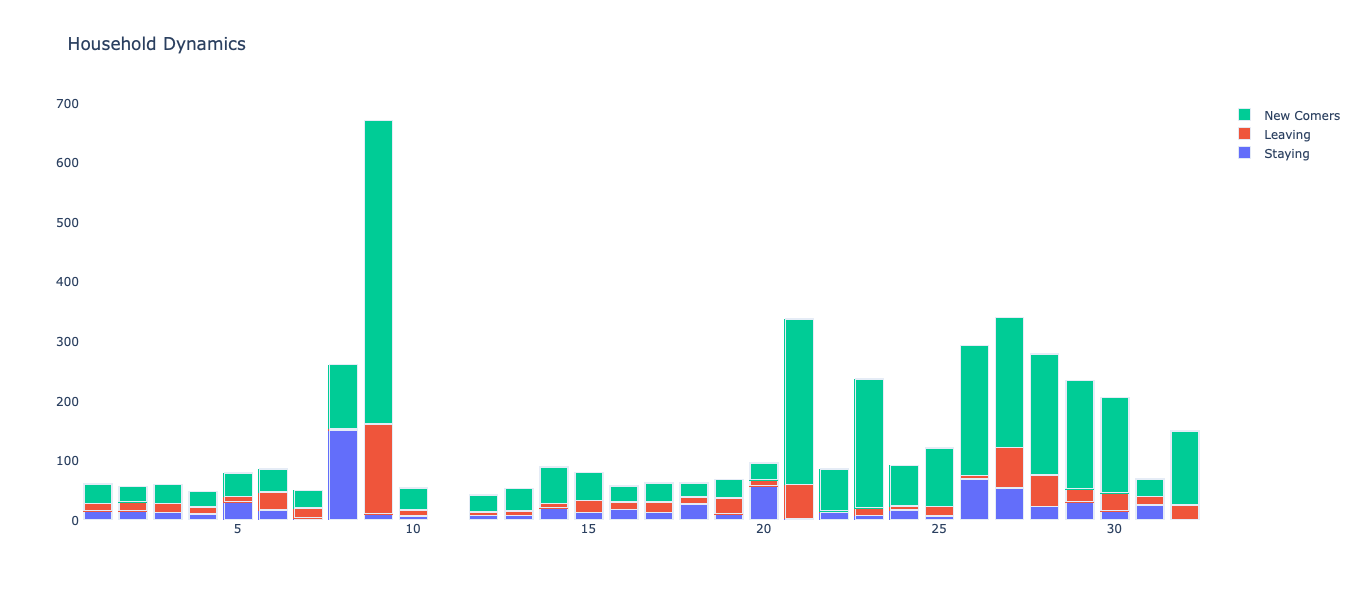

In [1325]:
#fig = px.bar(Addition, x="Tic", y=["Staying", "Leaving", "New Comers"], title="Household Dynamics")


fig = go.Figure(data=[go.Bar(name='Staying', x=Addition['Tic'], y=Addition['Staying']),
                      go.Bar(name='Leaving', x=Addition['Tic'], y=Addition['Leaving']),
                      go.Bar(name='New Comers', x=Addition['Tic'], y=Addition['New Comers'])
                     ])
# Change the bar mode
fig.update_layout(title_text='Household Dynamics', barmode='stack',width=900,height=600,plot_bgcolor='rgba(0,0,0,0)')
fig.show()

In [1262]:
Addition

,Tic,Staying,Leaving,New Comers,Project Type
1,1,885.0,12.0,33,1
2,2,870.0,15.0,25.0,1
3,3,855.0,15.0,32.0,1
4,4,843.0,12.0,26.0,1
5,5,834.0,9.0,39.0,2
6,6,804.0,30.0,39.0,1
7,7,788.0,16.0,30.0,1
8,8,785.0,3.0,107.0,2
9,9,635.0,150.0,510.0,3
10,10,625.0,10.0,37.0,2
